### Airline Arrivals

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

#### Exploratory Analysis
 - Context of Data
 - Start with Basics
 - Plot Numerical Distributions
 - Plot Categorical Distributions
 - Plot Segmentations
 - Study Correlations

In [2]:
df = pd.read_csv('data/2008.csv')
df.shape

(7009728, 29)

In [5]:
df.columns = [label_uncap(col,abr) for col in df.columns]

In [6]:
df.head()

,yr,mh,dayof_mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,...,txi_in_,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
df.columns

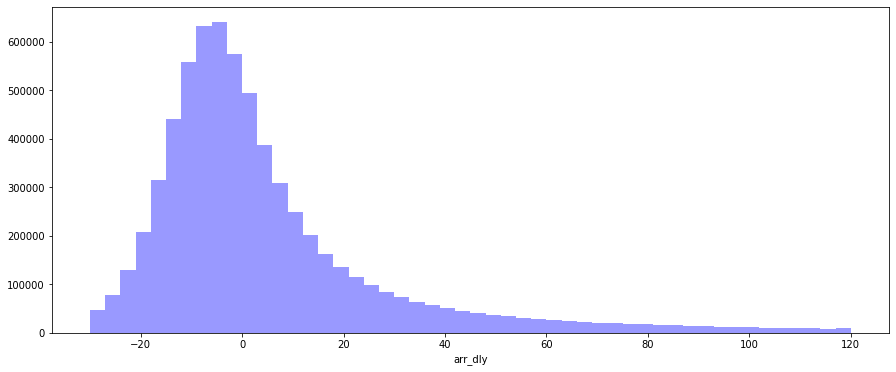

In [22]:
# plot continous arrival delay, drop nan values due to cancel or diverted
x = df.arr_dly.dropna()
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(x[(x >= -30) & (x <= 120)], color="b", kde = False,  ax=ax)
plt.show()

#### Data Cleaning
 - Remove Unwanted observations
 - Fix Structural Errors
 - Filter Unwanted Outliers
 - Handle Missing Data

In [7]:
dfc = df.drop(['yr', 'dayof_mh', 'tail_num'],  axis=1)
dfc.cnl_cde = dfc.cnl_cde.fillna(value='N')
dfc = dfc.fillna(value=0)

In [14]:
dff = dfc.drop(drop1, axis=1)

#### Feature Engineering
 **transform target**
 - Target "late" changed to binary based upon current 15 minute standard
 
**Infuse Domain Knowledge**
  - flight number not necessary as feature.  Flight is going from "origin" to "destination" at "scheduled time".  variance captured in other features. 
  - flight volume varies significantly based upon day of week and time of day.  There are definite peak times for business travelers
  
  - feature the scheduled duration / distance with scaled to standard.  The flight time between between airports is  
 
**Create Interaction Features**
- assigning fault to carrier or system correlates result to "carrier" feature or features that define "flight" 
 
**Combine Sparse Classes**


**Add Dummy Variables**

**Remove Unused Features**
 
 
 

In [18]:
dfc.columns

Index(['mh', 'dy_of_wk', 'dep_tme', 'crsdep_tme', 'arr_tme', 'crsarr_tme',
       'uqe_carrier', 'flight_num', 'actual_elapsed_tme', 'crselapsed_tme',
       'air_tme', 'arr_dly', 'dep_dly', 'origin', 'dest', 'distance',
       'txi_in_', 'txi_out', 'cnl', 'cnl_cde', 'diverted', 'carrier_dly',
       'whr_dly', 'nasdelay', 'security_dly', 'late_aircraft_dly'],
      dtype='object')

In [ ]:
['mh', 'dy_of_wk', 'dep_tme', 'crsdep_tme', 'arr_tme', 'crsarr_tme',
       ,', 


In [ ]:
# preprocess

grp_ord = ['crsdep_tme','crsarr_tme', 'dep_dly' ]
rnk_ord = ['mh', 'dy_of_wk', 'distance', 'uqe_carrier']
unq_dum = ['origin', 'dest']
nne =     ['diverted', 'cnl',]
new =     ['fault', ]

drp = ['dep_tme', 'carrier_dly', 'whr_dly', 'nasdelay', 'security_dly', 'late_aircraft_dly', 'cnl_cde',  'txi_in_',
       'txi_out',  'flight_num', 'actual_elapsed_tme', 'crselapsed_tme', 'air_tme', 'arr_dly', 'dep_dly']

dummies = ['flight_num', 'uqe_carrier', 'origin', 'dest']           
# scale 
nos = ['diverted', 'cnl', ]
std = 
rbt =         


In [9]:
dfc.groupby('dest').arr_dly.mean().describe()

count    304.000000
mean       7.366990
std        4.420851
min       -7.081081
25%        5.080639
50%        7.573907
75%        9.549675
max       28.901309
Name: arr_dly, dtype: float64

In [10]:
dfc.groupby('origin').dep_dly.mean().describe()

count    303.000000
mean       7.867873
std        4.889440
min       -6.132576
25%        5.576504
50%        8.055379
75%       10.199482
max       27.371991
Name: dep_dly, dtype: float64

In [41]:
dfc.txi_out[dfc.cnl == 0].describe()

count    6.872294e+06
mean     1.645279e+01
std      1.133228e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.400000e+01
75%      1.900000e+01
max      4.290000e+02
Name: txi_out, dtype: float64

In [47]:
no_cnl_dvd =  set(range(len(dfc))) - set(np.where(dfc.cnl == 1)[0]) - set(np.where(dfc.diverted == 1)[0])

In [50]:
dfc.loc[no_cnl_dvd][dfc.txi_out == 0].head()

C:\Users\chuck\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,actual_elapsed_tme,crselapsed_tme,...,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly,late
184709,1,4,2030.0,2025,2118.0,2123,OO,5798,48.0,58.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
185531,1,5,936.0,940,1029.0,1040,OO,3674,53.0,60.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
323747,1,6,1142.0,1142,1336.0,1351,EV,4178,54.0,69.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
324940,1,4,1043.0,1008,1321.0,1234,EV,4220,98.0,86.0,...,0.0,0,N,0,35.0,0.0,12.0,0.0,0.0,1
326663,1,5,1315.0,1315,1501.0,1512,EV,4279,46.0,57.0,...,0.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
len(dfc.flight_num.unique())

7539

In [30]:
dfc['late'] = np.where(dff.arr_dly >= 15, 1, 0)+ dfc.cnl + dfc.diverted




In [31]:
dfc.head()

,mh,dy_of_wk,dep_tme,crsdep_tme,arr_tme,crsarr_tme,uqe_carrier,flight_num,actual_elapsed_tme,crselapsed_tme,...,txi_out,cnl,cnl_cde,diverted,carrier_dly,whr_dly,nasdelay,security_dly,late_aircraft_dly,late
0,1,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,...,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
1,1,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,...,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
2,1,4,628.0,620,804.0,750,WN,448,96.0,90.0,...,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
3,1,4,926.0,930,1054.0,1100,WN,1746,88.0,90.0,...,7.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
4,1,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1


In [26]:
dfc.distance.max()

4962

In [20]:
dff.late = dff.late + dfc.cnl + dfc.diverted

In [25]:
2467 / 60

41.11666666666667

In [21]:
dff.late.unique()

array([0, 1], dtype=int64)

In [35]:
np.where(dfc.cnl == 1)

(array([    178,     373,     399, ..., 7009564, 7009565, 7009648],
       dtype=int64),)

In [39]:
dff.loc[np.where(dfc.cnl == 1)].head()

,arr_dly,dep_dly,crr_dly,whr_dly,nas_dly,sty_dly,lte_act_dly,late
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
dff = dfc.assign(all_delay=lambda df: df.Length*df.Height) 

In [ ]:
df['all_delay'] = df.carrierdelay + df.weatherdelay +  df.nasdelay + df.securitydelay + df.lateaircraftdelay

In [ ]:
df[]

In [3]:
def label_uncap (string, dict):
    S = []   
    for (i,c) in enumerate(string): 
        if not i:
            sub = c.lower(); c = ''; prv_upr = True
        else:
            if c.isupper():
                    if prv_upr:
                        prv_upr = True
                    else:
                        S.append(sub); sub = c.lower() ; c = ''; prv_upr = True
            else:
                prv_upr = False                
            sub += c.lower()
        if (i + 1 == len(string)):  
            S.append(sub)
        for (i, s) in enumerate(S):
            if s in dict:
                S[i] = dict[s]     
    return '_'.join(S)

In [4]:
abr = {'year':'yr', 'month':'mh', 'day':'dy', 'week':'wk',
      'unique':'uqe', 'time':'tme', 'taxi':'txi', 'in':'in_','weather':'whr',
      'delay':'dly', 'code':'cde', 'cancelled':'cnl', 'cancellation':'cnl',
      'c':'crs','r':'','s':'','a':'','n':'nas'}

In [ ]:
est_knn = KNeighborsRegressor()
est_rft = RandomForestRegressor(random_state = 1)
est_knn = KNeighborsRegressor()
est_rdg = Ridge(random_state=1)
est_lso = Lasso(random_state=1)
est_svr = SVR()
est_dtr = DecisionTreeRegressor()

#### Algorithm Selection Cross Value

#### Hyperparameter Selection

#### Model Training